# Rain in Australia
## Classification with Random Forest Classifier

In [12]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (f1_score, roc_auc_score,
                             classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

pd.set_option('display.max_columns', None)

import os
import sys

# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))

# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload all
from weather_data_processing import preprocess_data, predict_input

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read the data

In [13]:
raw_df = pd.read_csv('../data/weatherAUS.csv')
data_dict, model_components = preprocess_data(raw_df)

In [14]:
X_train = data_dict['train_X']
y_train = data_dict['train_y']
X_val = data_dict['val_X']
y_val = data_dict['val_y']
X_test = data_dict['test_X']
y_test = data_dict['test_y']

### Train and evaluate Random Forest Classifier


In [15]:
model = RandomForestClassifier(random_state=7, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

In [16]:
def eval_model(model, data_dict):
    scores = []
    print(type(model).__name__)
    for step in ['train', 'val']:
        pred_proba = model.predict_proba(data_dict[f'{step}_X'])[:, 1]
        auroc = roc_auc_score(data_dict[f'{step}_y'], pred_proba)
        scores.append(auroc)
        print(f"AUROC on {step} set: {auroc:.4f}")

        pred = model.predict(data_dict[f'{step}_X'])
        print(classification_report(data_dict[f'{step}_y'], pred, digits=4))

    return scores

In [12]:
auroc_scores = eval_model(model, data_dict)

RandomForestClassifier
AUROC on train set: 1.0000
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000     76190
         Yes     0.9999    1.0000    0.9999     21798

    accuracy                         1.0000     97988
   macro avg     0.9999    1.0000    1.0000     97988
weighted avg     1.0000    1.0000    1.0000     97988

AUROC on val set: 0.8785
              precision    recall  f1-score   support

          No     0.8635    0.9695    0.9135     13511
         Yes     0.7854    0.4215    0.5486      3578

    accuracy                         0.8548     17089
   macro avg     0.8245    0.6955    0.7310     17089
weighted avg     0.8472    0.8548    0.8371     17089



It seems than model with default parameters is not performing well and tends to overfit. Let's try to handle tune the hyperparameters of the model.

In [14]:
def try_parameters(data_dict, max_depth, max_leaf_nodes):
    print('Max Depth:', max_depth)
    print('Max Leaf Nodes:', max_leaf_nodes)

    model = RandomForestClassifier(max_depth=max_depth,
                                   max_leaf_nodes=max_leaf_nodes,
                                   random_state=7,
                                   class_weight='balanced')
    model.fit(data_dict['train_X'], data_dict['train_y'])
    for step in ['train', 'val']:
        pred_proba = model.predict_proba(data_dict[f'{step}_X'])[:, 1]
        auroc = roc_auc_score(data_dict[f'{step}_y'], pred_proba)
        print(f"\nAUROC on {step} set: {auroc:.4f}")
        preds = model.predict(data_dict[f'{step}_X'])
        f1 = f1_score(data_dict[f'{step}_y'], preds, pos_label='Yes')
        print(f'F1 score on {step} set: {f1:.4f}')

In [16]:
try_parameters(data_dict, max_depth=15, max_leaf_nodes=None)

Max Depth: 15
Max Leaf Nodes: None

AUROC on train set: 0.9495
F1 score on train set: 0.7618

AUROC on val set: 0.8723
F1 score on val set: 0.6222


In [17]:
try_parameters(data_dict, max_depth=20, max_leaf_nodes=None)

Max Depth: 20
Max Leaf Nodes: None

AUROC on train set: 0.9912
F1 score on train set: 0.9061

AUROC on val set: 0.8776
F1 score on val set: 0.6195


In [18]:
try_parameters(data_dict, max_depth=20, max_leaf_nodes=256)

Max Depth: 20
Max Leaf Nodes: 256

AUROC on train set: 0.8861
F1 score on train set: 0.6466

AUROC on val set: 0.8641
F1 score on val set: 0.6101


In [19]:
try_parameters(data_dict, max_depth=20, max_leaf_nodes=512)

Max Depth: 20
Max Leaf Nodes: 512

AUROC on train set: 0.9015
F1 score on train set: 0.6724

AUROC on val set: 0.8686
F1 score on val set: 0.6172


In [20]:
try_parameters(data_dict, max_depth=None, max_leaf_nodes=512)

Max Depth: None
Max Leaf Nodes: 512

AUROC on train set: 0.9018
F1 score on train set: 0.6709

AUROC on val set: 0.8692
F1 score on val set: 0.6202


In [21]:
try_parameters(data_dict, max_depth=None, max_leaf_nodes=450)

Max Depth: None
Max Leaf Nodes: 450

AUROC on train set: 0.8985
F1 score on train set: 0.6655

AUROC on val set: 0.8682
F1 score on val set: 0.6193


In [22]:
try_parameters(data_dict, max_depth=None, max_leaf_nodes=550)

Max Depth: None
Max Leaf Nodes: 550

AUROC on train set: 0.9037
F1 score on train set: 0.6742

AUROC on val set: 0.8695
F1 score on val set: 0.6217


In [30]:
try_parameters(data_dict, max_depth=None, max_leaf_nodes=525)

Max Depth: None
Max Leaf Nodes: 525

AUROC on train set: 0.9025
F1 score on train set: 0.6723

AUROC on val set: 0.8693
F1 score on val set: 0.6197


In [31]:
try_parameters(data_dict, max_depth=None, max_leaf_nodes=575)

Max Depth: None
Max Leaf Nodes: 575

AUROC on train set: 0.9049
F1 score on train set: 0.6763

AUROC on val set: 0.8697
F1 score on val set: 0.6215


The best performance with lower overfit (AUROC=0.8695, F1=0.6217) acheived with the following parameters:
- `max_leaf_nodes=550`
- `class_weight='balanced'`.model = RandomForestClassifier(max_leaf_nodes=550,
                               random_state=7,
                               class_weight='balanced')
model.fit(data_dict['train_X'], data_dict['train_y'])
auroc_scores = eval_model(model, data_dict)

In [67]:
model = RandomForestClassifier(max_leaf_nodes=550,
                               random_state=7,
                               class_weight='balanced')
model.fit(data_dict['train_X'], data_dict['train_y'])
auroc_scores = eval_model(model, data_dict)

RandomForestClassifier
AUROC on train set: 0.9037
              precision    recall  f1-score   support

          No     0.9410    0.8252    0.8793     76190
         Yes     0.5728    0.8192    0.6742     21798

    accuracy                         0.8239     97988
   macro avg     0.7569    0.8222    0.7768     97988
weighted avg     0.8591    0.8239    0.8337     97988

AUROC on val set: 0.8695
              precision    recall  f1-score   support

          No     0.9195    0.8410    0.8785     13511
         Yes     0.5460    0.7219    0.6217      3578

    accuracy                         0.8161     17089
   macro avg     0.7327    0.7815    0.7501     17089
weighted avg     0.8413    0.8161    0.8247     17089



In [ ]:
def get_confusion_matrix(model, X, y, step):
    preds = model.predict(X)
    fig, ax = plt.subplots(figsize=(4, 3))
    cf = confusion_matrix(y, preds, normalize='true')
    disp = ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes'])
    disp.plot(cmap='YlOrBr', ax=ax)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'Confusion Matrix for {step} Set')
    plt.show()

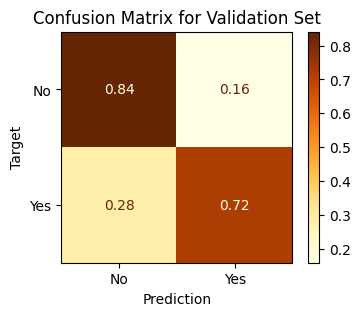

In [73]:
get_confusion_matrix(model, X_val, y_val, 'Validation')

AUROC on Test set: 0.8574


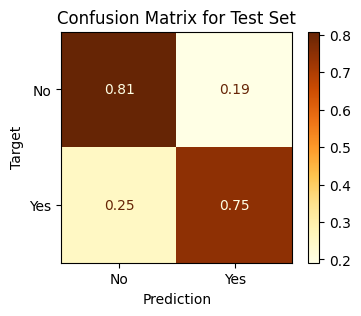

In [76]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC on Test set: {auroc:.4f}")

get_confusion_matrix(model, X_test, y_test, 'Test')

### Saving trained models

We can save the parameters of our trained model to disk so that we don't have to retrain the model from scratch every time we want to use it. Along with the model, it is also important to save imputer, scaler, encoder, and even column names. Everything that will be needed to generate predictions using the model should be saved.

We can use the `joblob` module to save and load Python objects to disk.

In [3]:
model = RandomForestClassifier(max_leaf_nodes=550,
                               random_state=7,
                               class_weight='balanced')
model.fit(data_dict['train_X'], data_dict['train_y'])

RandomForestClassifier(class_weight='balanced', max_leaf_nodes=550,
                       random_state=7)

In [4]:
aussie_rain = {
    'model': model,
    'imputer': model_components['imputer'],
    'scaler': model_components['scaler'],
    'encoder': model_components['encoder'],
    'input_cols': model_components['input_cols'],
    'target_col': model_components['target_col'],
    'numeric_cols': model_components['numeric_cols'],
    'categorical_cols': model_components['categorical_cols'],
    'encoded_cols': model_components['encoded_cols']
}

joblib.dump(aussie_rain, '../models/aussie_rain_rf.joblib')

['../models/aussie_rain_rf.joblib']

### Prediction on the new data

In [11]:
new_input = {'Location': 'Launceston',
             'MinTemp': 24.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}


predict_input(new_input, '../models/aussie_rain_rf.joblib')

('Yes', 0.7968778078474795)